In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [40]:
img = cv.imread('../static/canvas/images/input/photo1.jpg')
type(img)

numpy.ndarray

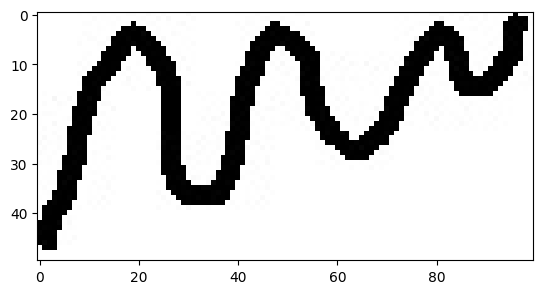

In [44]:
plt.imshow(img)

In [45]:
img.shape

(50, 100, 3)

In [59]:
def translate(img, shiftx, shifty, fillValue=(0,0,0)):
    M = np.float32([[1,0,shiftx],[0,1,shifty]])
    dst = cv.warpAffine(img,M,(img.shape[1],img.shape[0]),borderValue=fillValue)
    return dst

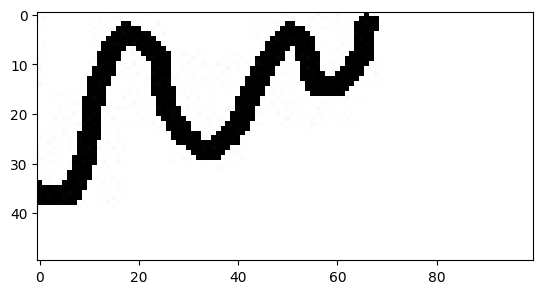

In [60]:
plt.imshow(translate(img,-30,0,(255,255,255)))

In [61]:
def crop(img, left, right, top, bottom):
    return img[0+top:img.shape[0]-bottom,0+left:img.shape[1]-right]

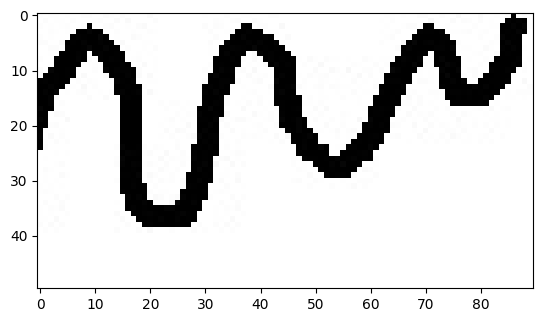

In [62]:
plt.imshow(crop(img,10,0,0,0))

In [63]:
def concat(img1, img2, mode):
    if mode=='vertical':
        return cv.vconcat([img1, img2])
    return cv.hconcat([img1, img2])

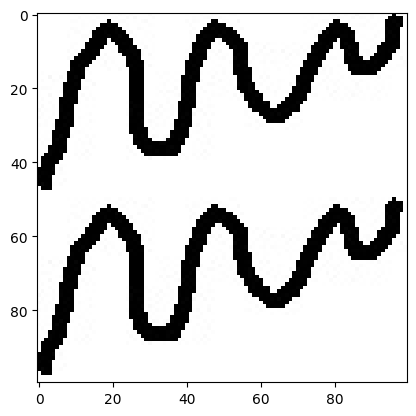

In [65]:
plt.imshow(concat(img,img,'vertical'))

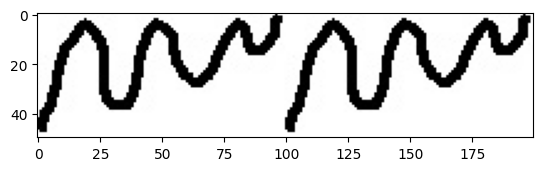

In [66]:
plt.imshow(concat(img,img,'horizontal'))

Thresholding

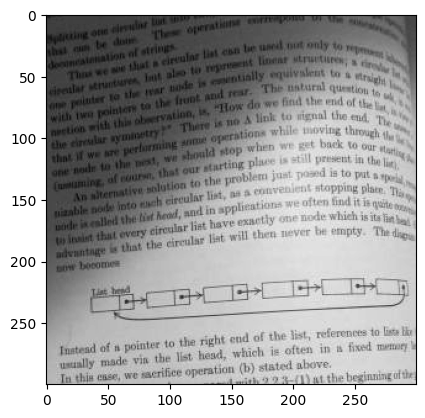

In [116]:
img = cv.imread('../static/canvas/images/input/book.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
type(img)
plt.imshow(img_gray,cmap='gray')

(array([2.000e+00, 1.000e+00, 4.000e+00, 1.000e+01, 2.900e+01, 3.000e+01,
        7.000e+01, 5.300e+01, 1.550e+02, 1.920e+02, 1.430e+02, 3.620e+02,
        3.990e+02, 2.320e+02, 5.100e+02, 3.030e+02, 6.400e+02, 6.900e+02,
        4.040e+02, 8.580e+02, 9.730e+02, 4.730e+02, 1.082e+03, 6.800e+02,
        1.934e+03, 2.351e+03, 1.169e+03, 2.618e+03, 1.325e+03, 2.210e+03,
        1.765e+03, 7.680e+02, 1.369e+03, 1.243e+03, 5.240e+02, 1.057e+03,
        5.140e+02, 9.790e+02, 9.340e+02, 4.790e+02, 1.073e+03, 9.600e+02,
        4.440e+02, 9.290e+02, 4.370e+02, 8.520e+02, 8.400e+02, 4.120e+02,
        8.920e+02, 4.370e+02, 8.450e+02, 7.500e+02, 4.270e+02, 8.440e+02,
        7.960e+02, 4.530e+02, 8.850e+02, 4.350e+02, 8.710e+02, 9.380e+02,
        5.000e+02, 9.480e+02, 9.550e+02, 5.360e+02, 1.018e+03, 5.310e+02,
        1.181e+03, 1.133e+03, 5.990e+02, 1.384e+03, 1.570e+03, 8.560e+02,
        2.000e+03, 9.230e+02, 2.168e+03, 2.118e+03, 1.088e+03, 2.193e+03,
        1.113e+03, 2.358e+03, 2.823e+0

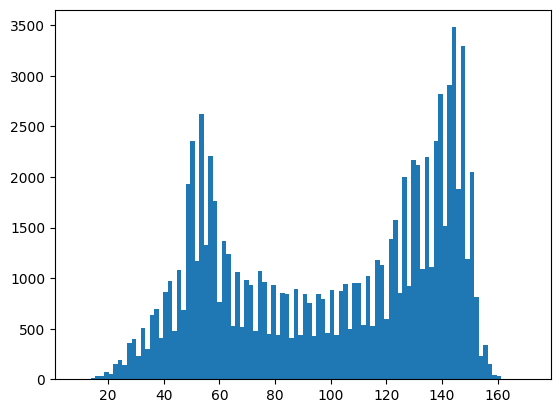

In [120]:
plt.hist(img_gray.flatten(), bins=100)

In [121]:
def fixed_threshold(img, threshold, maxv=255):
    _, r = cv.threshold(img,threshold,maxv,cv.THRESH_BINARY)
    return r

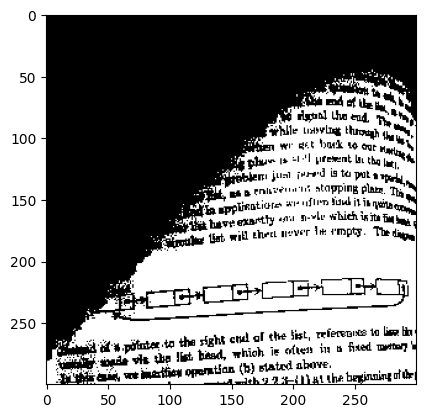

In [123]:
plt.imshow(fixed_threshold(img_gray,120),cmap='gray')

In [115]:
def local_threshold(img, threshold, maxv=255):
    _, r = cv.threshold(img,threshold,maxv,cv.THRESH_BINARY)
    return r

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255,   0,   0, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [138]:
def adaptive_threshold(img, block_size, C, mode, maxv=255):
    if mode == 'mean':
        return cv.adaptiveThreshold(img,maxv,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,block_size,C)
    return cv.adaptiveThreshold(img,maxv,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,block_size,C)

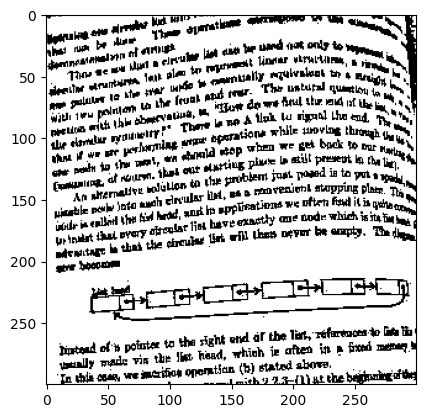

In [139]:
plt.imshow(adaptive_threshold(img_gray,27,5,'mean'),cmap='gray')

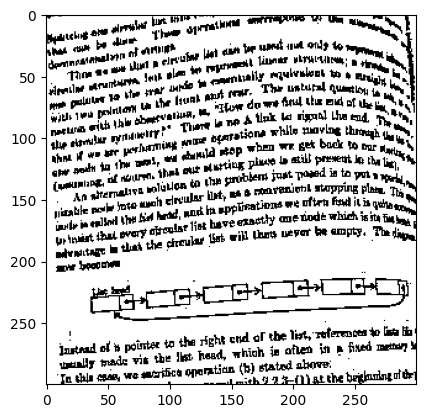

In [140]:
plt.imshow(adaptive_threshold(img_gray,27,5,'gaussian'),cmap='gray')
